In [3]:
plt.xkcd()

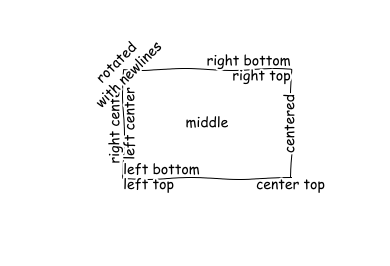

In [4]:
"""
You can precisely layout text in data or axes (0,1) coordinates.  This
example shows you some of the alignment and rotation specifications to
layout text
"""

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
ax = plt.gca()
p = plt.Rectangle((left, bottom), width, height,
              fill=False,
              )
p.set_transform(ax.transAxes)
p.set_clip_on(False)
ax.add_patch(p)


ax.text(left, bottom, 'left top',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, bottom, 'left bottom',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right bottom',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right top',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(right, bottom, 'center top',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom + top), 'right center',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom + top), 'left center',
        horizontalalignment='left',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(0.5*(left + right), 0.5*(bottom + top), 'middle',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)

ax.text(right, 0.5*(bottom + top), 'centered',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, top, 'rotated\nwith newlines',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=45,
        transform=ax.transAxes)

plt.axis('off')

plt.show()

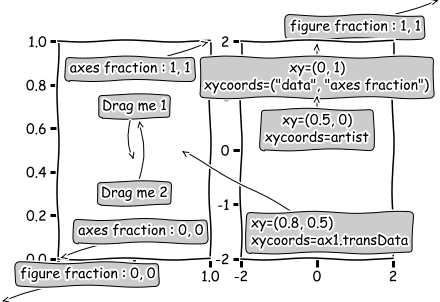

In [14]:
import matplotlib.pyplot as plt
from matplotlib.text import OffsetFrom


fig, (ax1, ax2) = plt.subplots(1, 2)

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

ax1.annotate('figure fraction : 0, 0', xy=(0, 0), xycoords='figure fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('figure fraction : 1, 1', xy=(1, 1), xycoords='figure fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 0, 0', xy=(0, 0), xycoords='axes fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 1, 1', xy=(1, 1), xycoords='axes fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)


an1 = ax1.annotate('Drag me 1', xy=(.5, .7), xycoords='data',
                   #xytext=(.5, .7), textcoords='data',
                   ha="center", va="center",
                   bbox=bbox_args,
                   #arrowprops=arrow_args
                   )

an2 = ax1.annotate('Drag me 2', xy=(.5, .5), xycoords=an1,
                   xytext=(.5, .3), textcoords='axes fraction',
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchB=an1.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))

an3 = ax1.annotate('', xy=(.5, .5), xycoords=an2,
                   xytext=(.5, .5), textcoords=an1,
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchA=an1.get_bbox_patch(),
                                   patchB=an2.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))


t = ax2.annotate('xy=(0, 1)\nxycoords=("data", "axes fraction")',
                 xy=(0, 1), xycoords=("data", 'axes fraction'),
                 xytext=(0, -20), textcoords='offset points',
                 ha="center", va="top",
                 bbox=bbox_args,
                 arrowprops=arrow_args)

ax2.annotate('xy=(0.5, 0)\nxycoords=artist',
             xy=(0.5, 0.), xycoords=t,
             xytext=(0, -20), textcoords='offset points',
             ha="center", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.annotate('xy=(0.8, 0.5)\nxycoords=ax1.transData',
             xy=(0.8, 0.5), xycoords=ax1.transData,
             xytext=(10, 10),
             textcoords=OffsetFrom(ax2.bbox, (0, 0), "points"),
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])

an1.draggable()
an2.draggable()

plt.show()

step 0


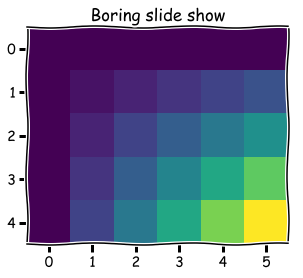

step 1
step 2
step 3
step 4


In [15]:
"""
Pyplot animation example.

The method shown here is only for very simple, low-performance
use.  For more demanding applications, look at the animation
module and the examples that use it.
"""

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(6)
y = np.arange(5)
z = x * y[:, np.newaxis]

for i in range(5):
    if i == 0:
        p = plt.imshow(z)
        fig = plt.gcf()
        plt.clim()   # clamp the color limits
        plt.title("Boring slide show")
    else:
        z = z + 2
        p.set_data(z)

    print("step", i)
    plt.pause(0.5)
    plt.show()

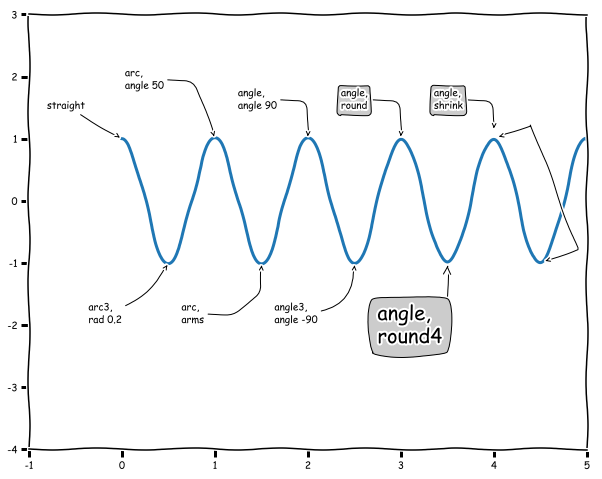

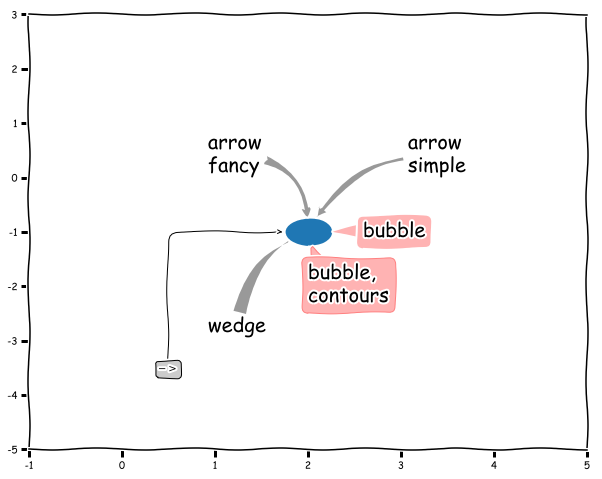

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np


fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 5), ylim=(-4, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=3)

ax.annotate('straight',
            xy=(0, 1), xycoords='data',
            xytext=(-50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('arc3,\nrad 0.2',
            xy=(0.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2"))

ax.annotate('arc,\nangle 50',
            xy=(1., 1), xycoords='data',
            xytext=(-90, 50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=50,rad=10"))

ax.annotate('arc,\narms',
            xy=(1.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=40,angleB=-90,armB=30,rad=7"))

ax.annotate('angle,\nangle 90',
            xy=(2., 1), xycoords='data',
            xytext=(-70, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate('angle3,\nangle -90',
            xy=(2.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('angle,\nround',
            xy=(3., 1), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate('angle,\nround4',
            xy=(3.5, -1), xycoords='data',
            xytext=(-70, -80), textcoords='offset points',
            size=20,
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=-90,rad=10"))

ax.annotate('angle,\nshrink',
            xy=(4., 1), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=10,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# You can pass an empty string to get only annotation arrows rendered
ann = ax.annotate('', xy=(4., 1.), xycoords='data',
                  xytext=(4.5, -1), textcoords='data',
                  arrowprops=dict(arrowstyle="<->",
                                  connectionstyle="bar",
                                  ec="k",
                                  shrinkA=5, shrinkB=5))


fig = plt.figure(2, figsize=(10, 8))
fig.clf()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 5), ylim=(-5, 3))

el = Ellipse((2, -1), 0.5, 0.5)
ax.add_patch(el)

ax.annotate('$->$',
            xy=(2., -1), xycoords='data',
            xytext=(-150, -140), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            patchB=el,
                            connectionstyle="angle,angleA=90,angleB=0,rad=10"))

ax.annotate('arrow\nfancy',
            xy=(2., -1), xycoords='data',
            xytext=(-100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('arrow\nsimple',
            xy=(2., -1), xycoords='data',
            xytext=(100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=0.3"))

ax.annotate('wedge',
            xy=(2., -1), xycoords='data',
            xytext=(-100, -100), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=-0.3"))

ann = ax.annotate('bubble,\ncontours',
                  xy=(2., -1), xycoords='data',
                  xytext=(0, -70), textcoords='offset points',
                  size=20,
                  bbox=dict(boxstyle="round",
                            fc=(1.0, 0.7, 0.7),
                            ec=(1., .5, .5)),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.8),
                                  connectionstyle="arc3,rad=-0.1"))

ann = ax.annotate('bubble',
                  xy=(2., -1), xycoords='data',
                  xytext=(55, 0), textcoords='offset points',
                  size=20, va="center",
                  bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec="none",
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.5)))

plt.show()

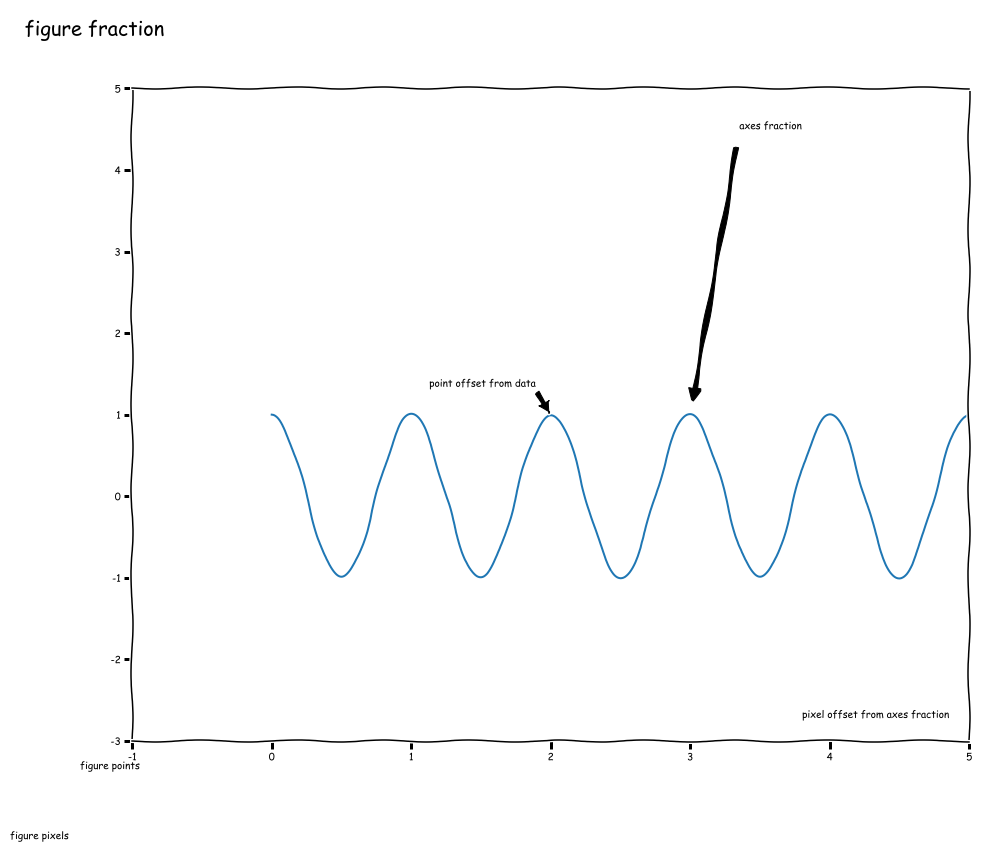

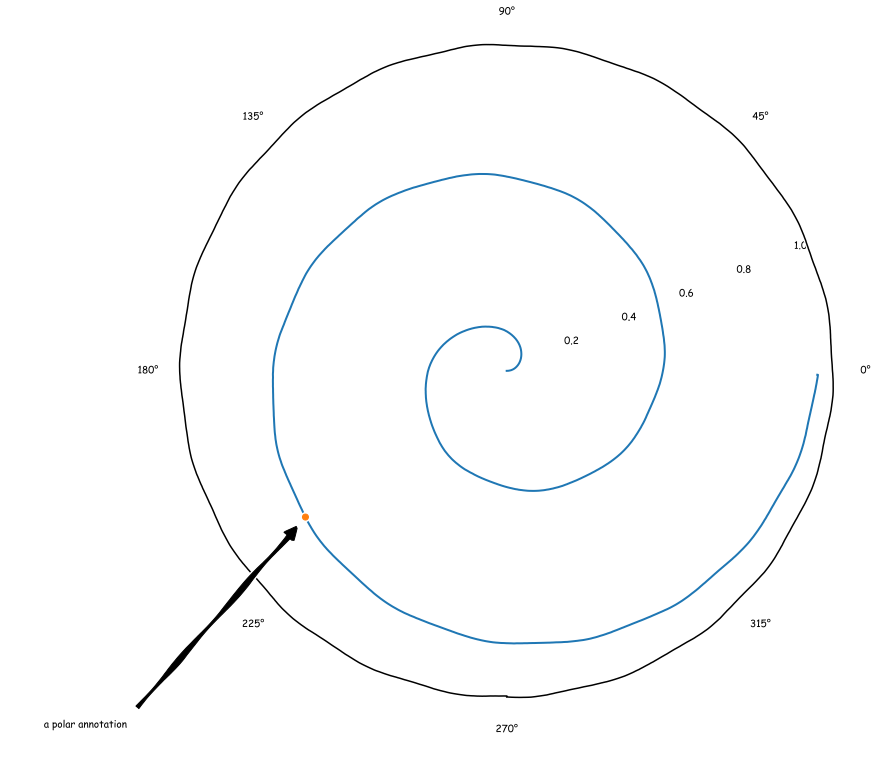

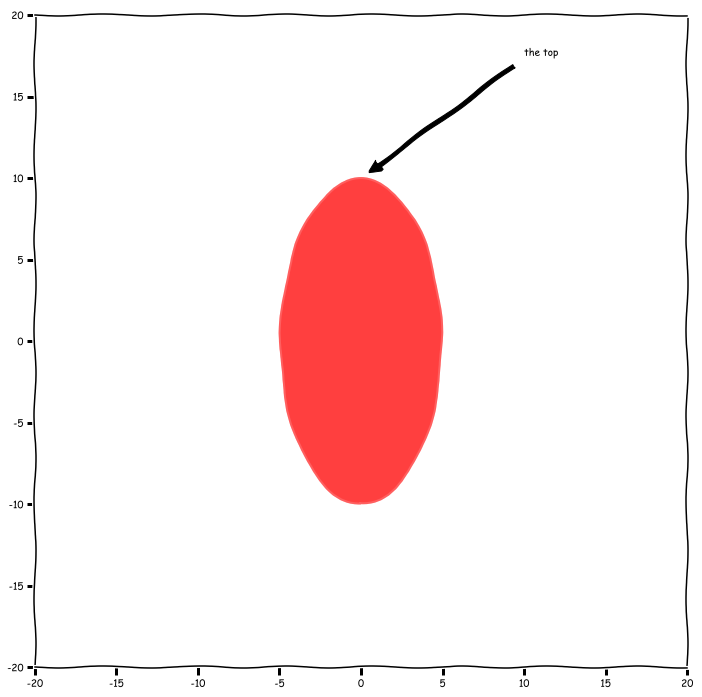

In [9]:
"""
Some examples of how to annotate points in figures.  You specify an
annotation point xy=(x,y) and a text point xytext=(x,y) for the
annotated points and text location, respectively.  Optionally, you can
specify the coordinate system of xy and xytext with one of the
following strings for xycoords and textcoords (default is 'data')


  'figure points'   : points from the lower left corner of the figure
  'figure pixels'   : pixels from the lower left corner of the figure
  'figure fraction' : 0,0 is lower left of figure and 1,1 is upper, right
  'axes points'     : points from lower left corner of axes
  'axes pixels'     : pixels from lower left corner of axes
  'axes fraction'   : 0,0 is lower left of axes and 1,1 is upper right
  'offset points'   : Specify an offset (in points) from the xy value
  'offset pixels'   : Specify an offset (in pixels) from the xy value
  'data'            : use the axes data coordinate system

Optionally, you can specify arrow properties which draws and arrow
from the text to the annotated point by giving a dictionary of arrow
properties

Valid keys are

          width : the width of the arrow in points
          frac  : the fraction of the arrow length occupied by the head
          headwidth : the width of the base of the arrow head in points
          shrink : move the tip and base some percent away from the
                   annotated point and text
          any key for matplotlib.patches.polygon  (e.g., facecolor)

For physical coordinate systems (points or pixels) the origin is the
(bottom, left) of the figure or axes.
"""


import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np


# If only one location is given, the text and xypoint being
# annotated are assumed to be the same
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 5), ylim=(-3, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s)

ax.annotate('figure pixels',
            xy=(10, 10), xycoords='figure pixels')

ax.annotate('figure points',
            xy=(80, 80), xycoords='figure points')

ax.annotate('point offset from data',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.annotate('axes fraction',
            xy=(3, 1), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('figure fraction',
            xy=(.025, .975), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

# use negative points or pixels to specify from right, top -10, 10
# is 10 points to the left of the right side of the axes and 10
# points above the bottom
ax.annotate('pixel offset from axes fraction',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')


# You can specify the xypoint and the xytext in different positions and
# coordinate systems, and optionally turn on a connecting line and mark
# the point with a marker.  Annotations work on polar axes too.
# In the example below, the xy point is in native coordinates (xycoords
# defaults to 'data').  For a polar axes, this is in (theta, radius) space.
# The text in the example is placed in the fractional figure coordinate system.
# Text keyword args like horizontal and vertical alignment are respected.
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')


# You can also use polar notation on a cartesian axes.  Here the native
# coordinate system ('data') is cartesian, so you need to specify the
# xycoords and textcoords as 'polar' if you want to use (theta, radius).

el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.add_artist(el)
el.set_clip_box(ax.bbox)
ax.annotate('the top',
            xy=(np.pi/2., 10.),      # theta, radius
            xytext=(np.pi/3, 20.),   # theta, radius
            xycoords='polar',
            textcoords='polar',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])

plt.show()

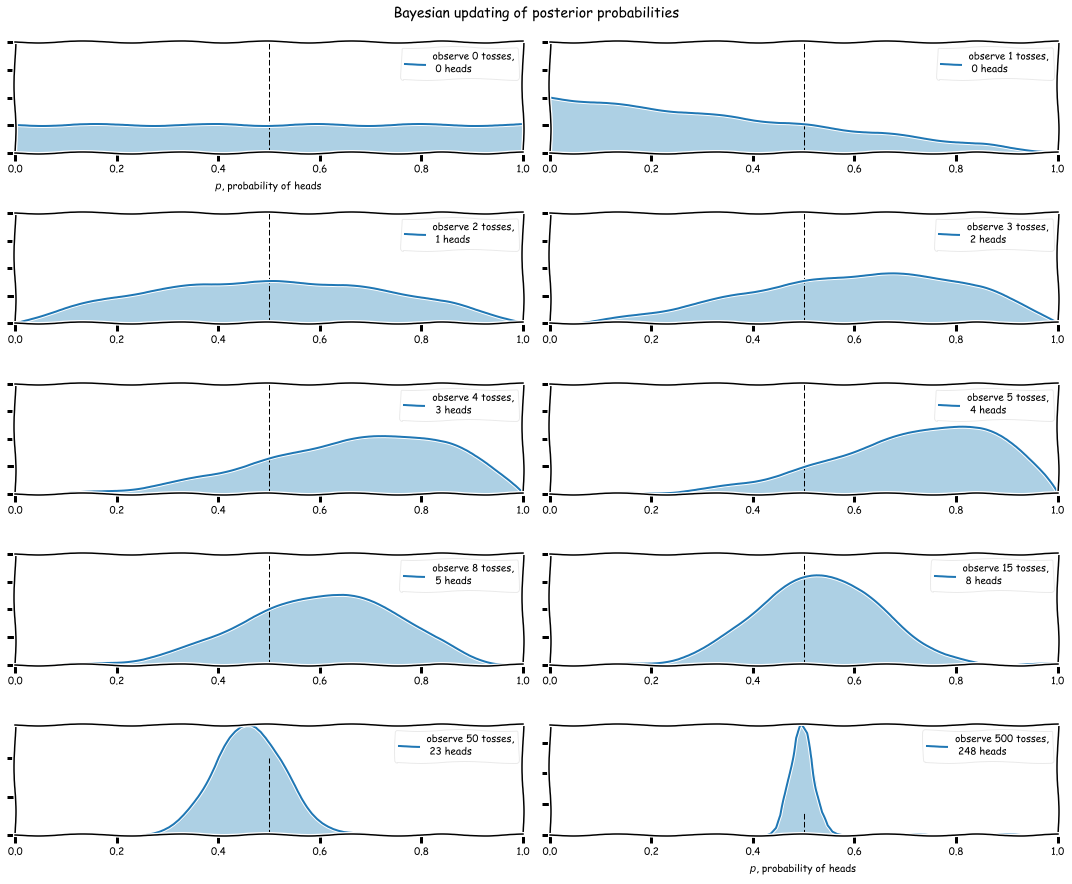

In [8]:
"""
The book uses a custom matplotlibrc file, which provides the unique styles for
matplotlib plots. If executing this book, and you wish to use the book's
styling, provided are two options:
    1. Overwrite your own matplotlibrc file with the rc-file provided in the
       book's styles/ dir. See http://matplotlib.org/users/customizing.html
    2. Also in the styles is  bmh_matplotlibrc.json file. This can be used to
       update the styles in only this notebook. Try running the following code:

        import json, matplotlib
        s = json.load( open("../styles/bmh_matplotlibrc.json") )
        matplotlib.rcParams.update(s)

"""

# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(15,12)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

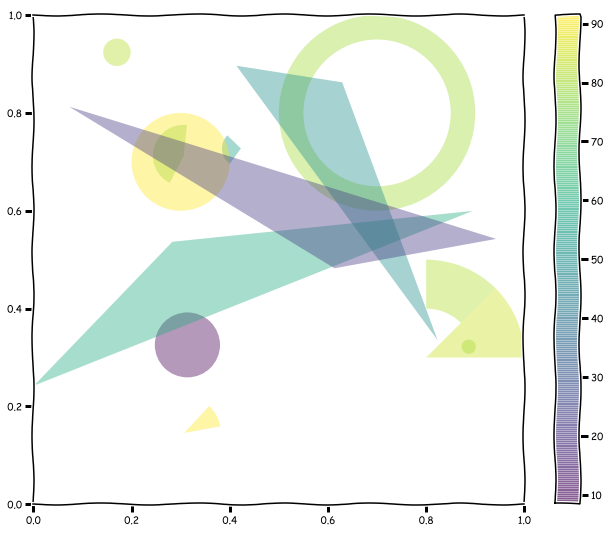

In [41]:
"""
============================
Circles, Wedges and Polygons
============================
"""

import numpy as np
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

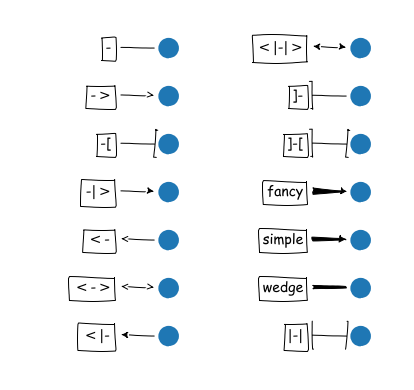

In [43]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

styles = mpatches.ArrowStyle.get_styles()

ncol = 2
nrow = (len(styles) + 1) // ncol
figheight = (nrow + 0.5)
fig1 = plt.figure(1, (4.*ncol/1.5, figheight/1.5))
fontsize = 0.2 * 70


ax = fig1.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4*ncol)
ax.set_ylim(0, figheight)


def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("|", r"$|$")
    return s

for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
    x = 3.2 + (i//nrow)*4
    y = (figheight - 0.7 - i % nrow)  # /figheight
    p = mpatches.Circle((x, y), 0.2)
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x - 1.2, y),
                #xycoords="figure fraction", textcoords="figure fraction",
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


plt.draw()
plt.show()